In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [4]:
df.replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)

In [5]:
X = df[['horsepower']]
y = df['mpg']

In [6]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
degrees = [2, 3, 4]
results = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[d] = (mse, rmse, r2)

In [10]:
for d, metrics in results.items():
    print(f"Degree {d}")
    print("MSE :", metrics[0])
    print("RMSE:", metrics[1])
    print("R²  :", metrics[2])
    print("------------------")

Degree 2
MSE : 13.760855128148345
RMSE: 3.709562659957147
R²  : 0.7440623896917427
------------------
Degree 3
MSE : 13.813374257349995
RMSE: 3.716634802795399
R²  : 0.7430855884466044
------------------
Degree 4
MSE : 14.11802402282964
RMSE: 3.7573959097797562
R²  : 0.7374194192854788
------------------


In [11]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_scaled)

X_train_p, X_test_p, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_p, y_train)

y_pred_ridge = ridge.predict(X_test_p)

print("Ridge MSE :", mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R²  :", r2_score(y_test, y_pred_ridge))

Ridge MSE : 14.013043715614137
Ridge RMSE: 3.7434000207851335
Ridge R²  : 0.7393719439438631


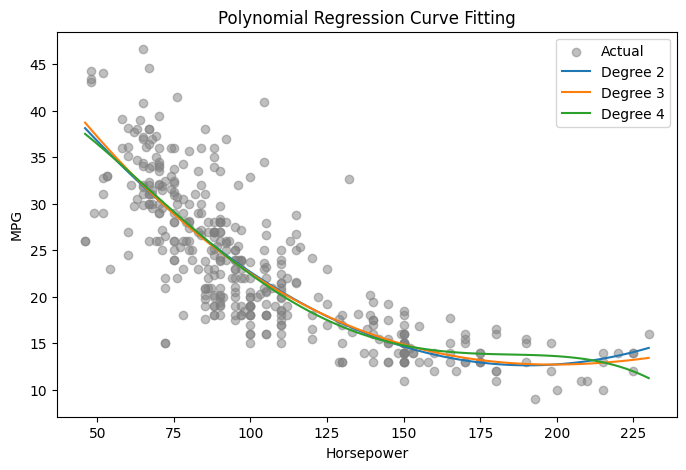

In [12]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='gray', alpha=0.5, label="Actual")

for d in degrees:
    poly = PolynomialFeatures(d)
    X_plot_poly = poly.fit_transform(X_plot_scaled)
    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)
    plt.plot(X_plot, model.predict(X_plot_poly), label=f"Degree {d}")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.title("Polynomial Regression Curve Fitting")
plt.show()

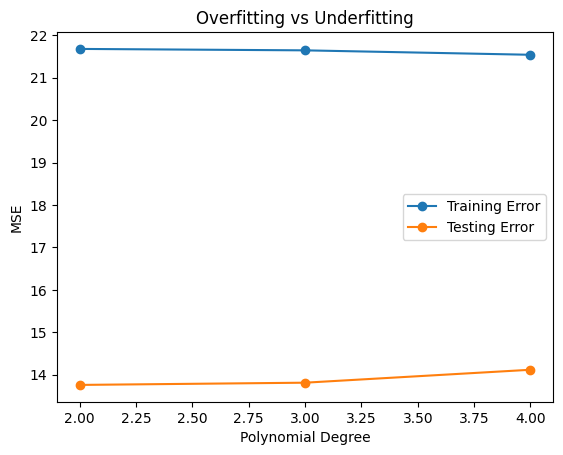

In [13]:
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(d)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_poly)))

plt.plot(degrees, train_errors,marker='o', label="Training Error")
plt.plot(degrees, test_errors,marker='o', label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()
plt.title("Overfitting vs Underfitting")
plt.show()